# Step 1: Problem Understanding
    
    age: age of patient in years
    
    sex: gender of the patient
    
    chest_pain_type: type of the chest pain patient having
    
    resting_blood_pressure: refers to your blood pressure when you're at rest, typically measured after you've been sitting quietly for a few minutes.
    
    Cholesterol: Cholesterol is a fatty substance that's vital for the body's normal functioning
    
    fasting_blood_sugar: Fasting blood sugar, also known as fasting glucose, is a measurement of the concentration of glucose (sugar) in your blood after a period of fasting.
    
    resting_electrocardiogram: ECG is a non-invasive test used to measure the electrical activity of your heart while you are at rest. It's a common diagnostic tool used to assess heart health and detect various cardiac abnormalities.
    
    max_heart_rate_achieved: refers to the highest number of heartbeats per minute (bpm) that a person reaches during physical activity or exercise.
    
    exercise_induced_angina: is chest discomfort or pain that occurs during physical activity or exertion
    
    st_depression: refers to a specific abnormality seen on an electrocardiogram (ECG or EKG) where the ST segment of the ECG waveform is lower than the baseline
    
    st_slope: refers to the direction and angle of the ST segment on an electrocardiogram (ECG or EKG)
    
    target: refers to a patient is having disease or not based on following characterstics

# Step 2 : Dataset Attributes Description
           
               
       S.No             Attribute                                    Units                                   Data Type
       
       1.               Age                                          Years                                   Numeric
       2.               Sex                                          0 = Female,                             Binary
                                                                     1 = Male
       
       3.               Chest Pain Type                              Value 1: typical angina                 Nominal
                                                                     Value 2: atypical angina
                                                                     Value 3: non-anginal pain
                                                                     Value 4: asymptomatic
       
       4.               resting blood pressure                       in mm HG                                Numeric
       
       5.               serum cholestrol                             in mg/dl                                Numeric
       
       6.               fasting blood sugar                          ( > 120 mg/dl)                          Binary                
                                                                      1 = True
                                                                      0 = False
                                               
       7.               resting electrocardiogram results             Value 0: normal                        Nominal
       
                                                                      Value 1: having ST-T wave abnormality 
                                                                      (T wave inversions and/or ST elevation 
                                                                      or depression of > 0.05 mV)
                                                                      
                                                                      Value 2: showing probable or definite left 
                                                                      ventricular hypertrophy by Estes' criteria
                                                                      
       8.               maximum heart rate achieved                   71 - 202                               Numeric
       
       9.               exercise induced angina                       1 = Yes , 0 = No                       Binary
       
       10.              oldpeak = ST                                  Depression                             Numeric
       
       11.              the slope of the peak exercise ST segment     Value 1: upsloping                     Nominal
                                                                      Value 2: flat
                                                                      Value 3: downsloping
                                                                      
                                                                      
       12.              Target / class                                1 = Heart disease                      Binary
                                                                      0 = Normal
                

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [4]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
df.shape

(1190, 12)

In [7]:
df = df.rename(
    columns = {'chest pain type':'chest_pain_type', 
               'resting bp s':'resting_blood_pressure', 
               'fasting blood sugar': 'fasting_blood_sugar',
               'resting ecg' : 'resting_electrocardiogram', 
               'max heart rate': 'max_heart_rate_achieved', 
               'exercise angina': 'exercise_induced_angina',
               'ST slope': 'st_slope'}, 
    errors="raise")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        1190 non-null   int64  
 1   sex                        1190 non-null   int64  
 2   chest_pain_type            1190 non-null   int64  
 3   resting_blood_pressure     1190 non-null   int64  
 4   cholesterol                1190 non-null   int64  
 5   fasting_blood_sugar        1190 non-null   int64  
 6   resting_electrocardiogram  1190 non-null   int64  
 7   max_heart_rate_achieved    1190 non-null   int64  
 8   exercise_induced_angina    1190 non-null   int64  
 9   oldpeak                    1190 non-null   float64
 10  st_slope                   1190 non-null   int64  
 11  target                     1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [10]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [11]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,oldpeak,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [12]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,oldpeak,st_slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest_pain_type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting_blood_pressure,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting_blood_sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting_electrocardiogram,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max_heart_rate_achieved,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise_induced_angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


Now we check missing values if any

In [13]:
df.isnull().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
oldpeak                      0
st_slope                     0
target                       0
dtype: int64

Check whether Dataset contains duplicate values or not

In [14]:
df.duplicated().sum()

272

Checking the unique value for each feature

In [15]:
column = list(df.columns)

for val in column:
    print(val ,' : ', df[val].nunique(),end='\n\n')

age  :  50

sex  :  2

chest_pain_type  :  4

resting_blood_pressure  :  67

cholesterol  :  222

fasting_blood_sugar  :  2

resting_electrocardiogram  :  3

max_heart_rate_achieved  :  119

exercise_induced_angina  :  2

oldpeak  :  53

st_slope  :  4

target  :  2



Now we can check which features highly corelate to Target

In [16]:
df.corr()['target'].sort_values(ascending=True)

max_heart_rate_achieved     -0.413278
cholesterol                 -0.198366
resting_electrocardiogram    0.073059
resting_blood_pressure       0.121415
fasting_blood_sugar          0.216695
age                          0.262029
sex                          0.311267
oldpeak                      0.398385
chest_pain_type              0.460127
exercise_induced_angina      0.481467
st_slope                     0.505608
target                       1.000000
Name: target, dtype: float64

We make some plot to analyze the dataset

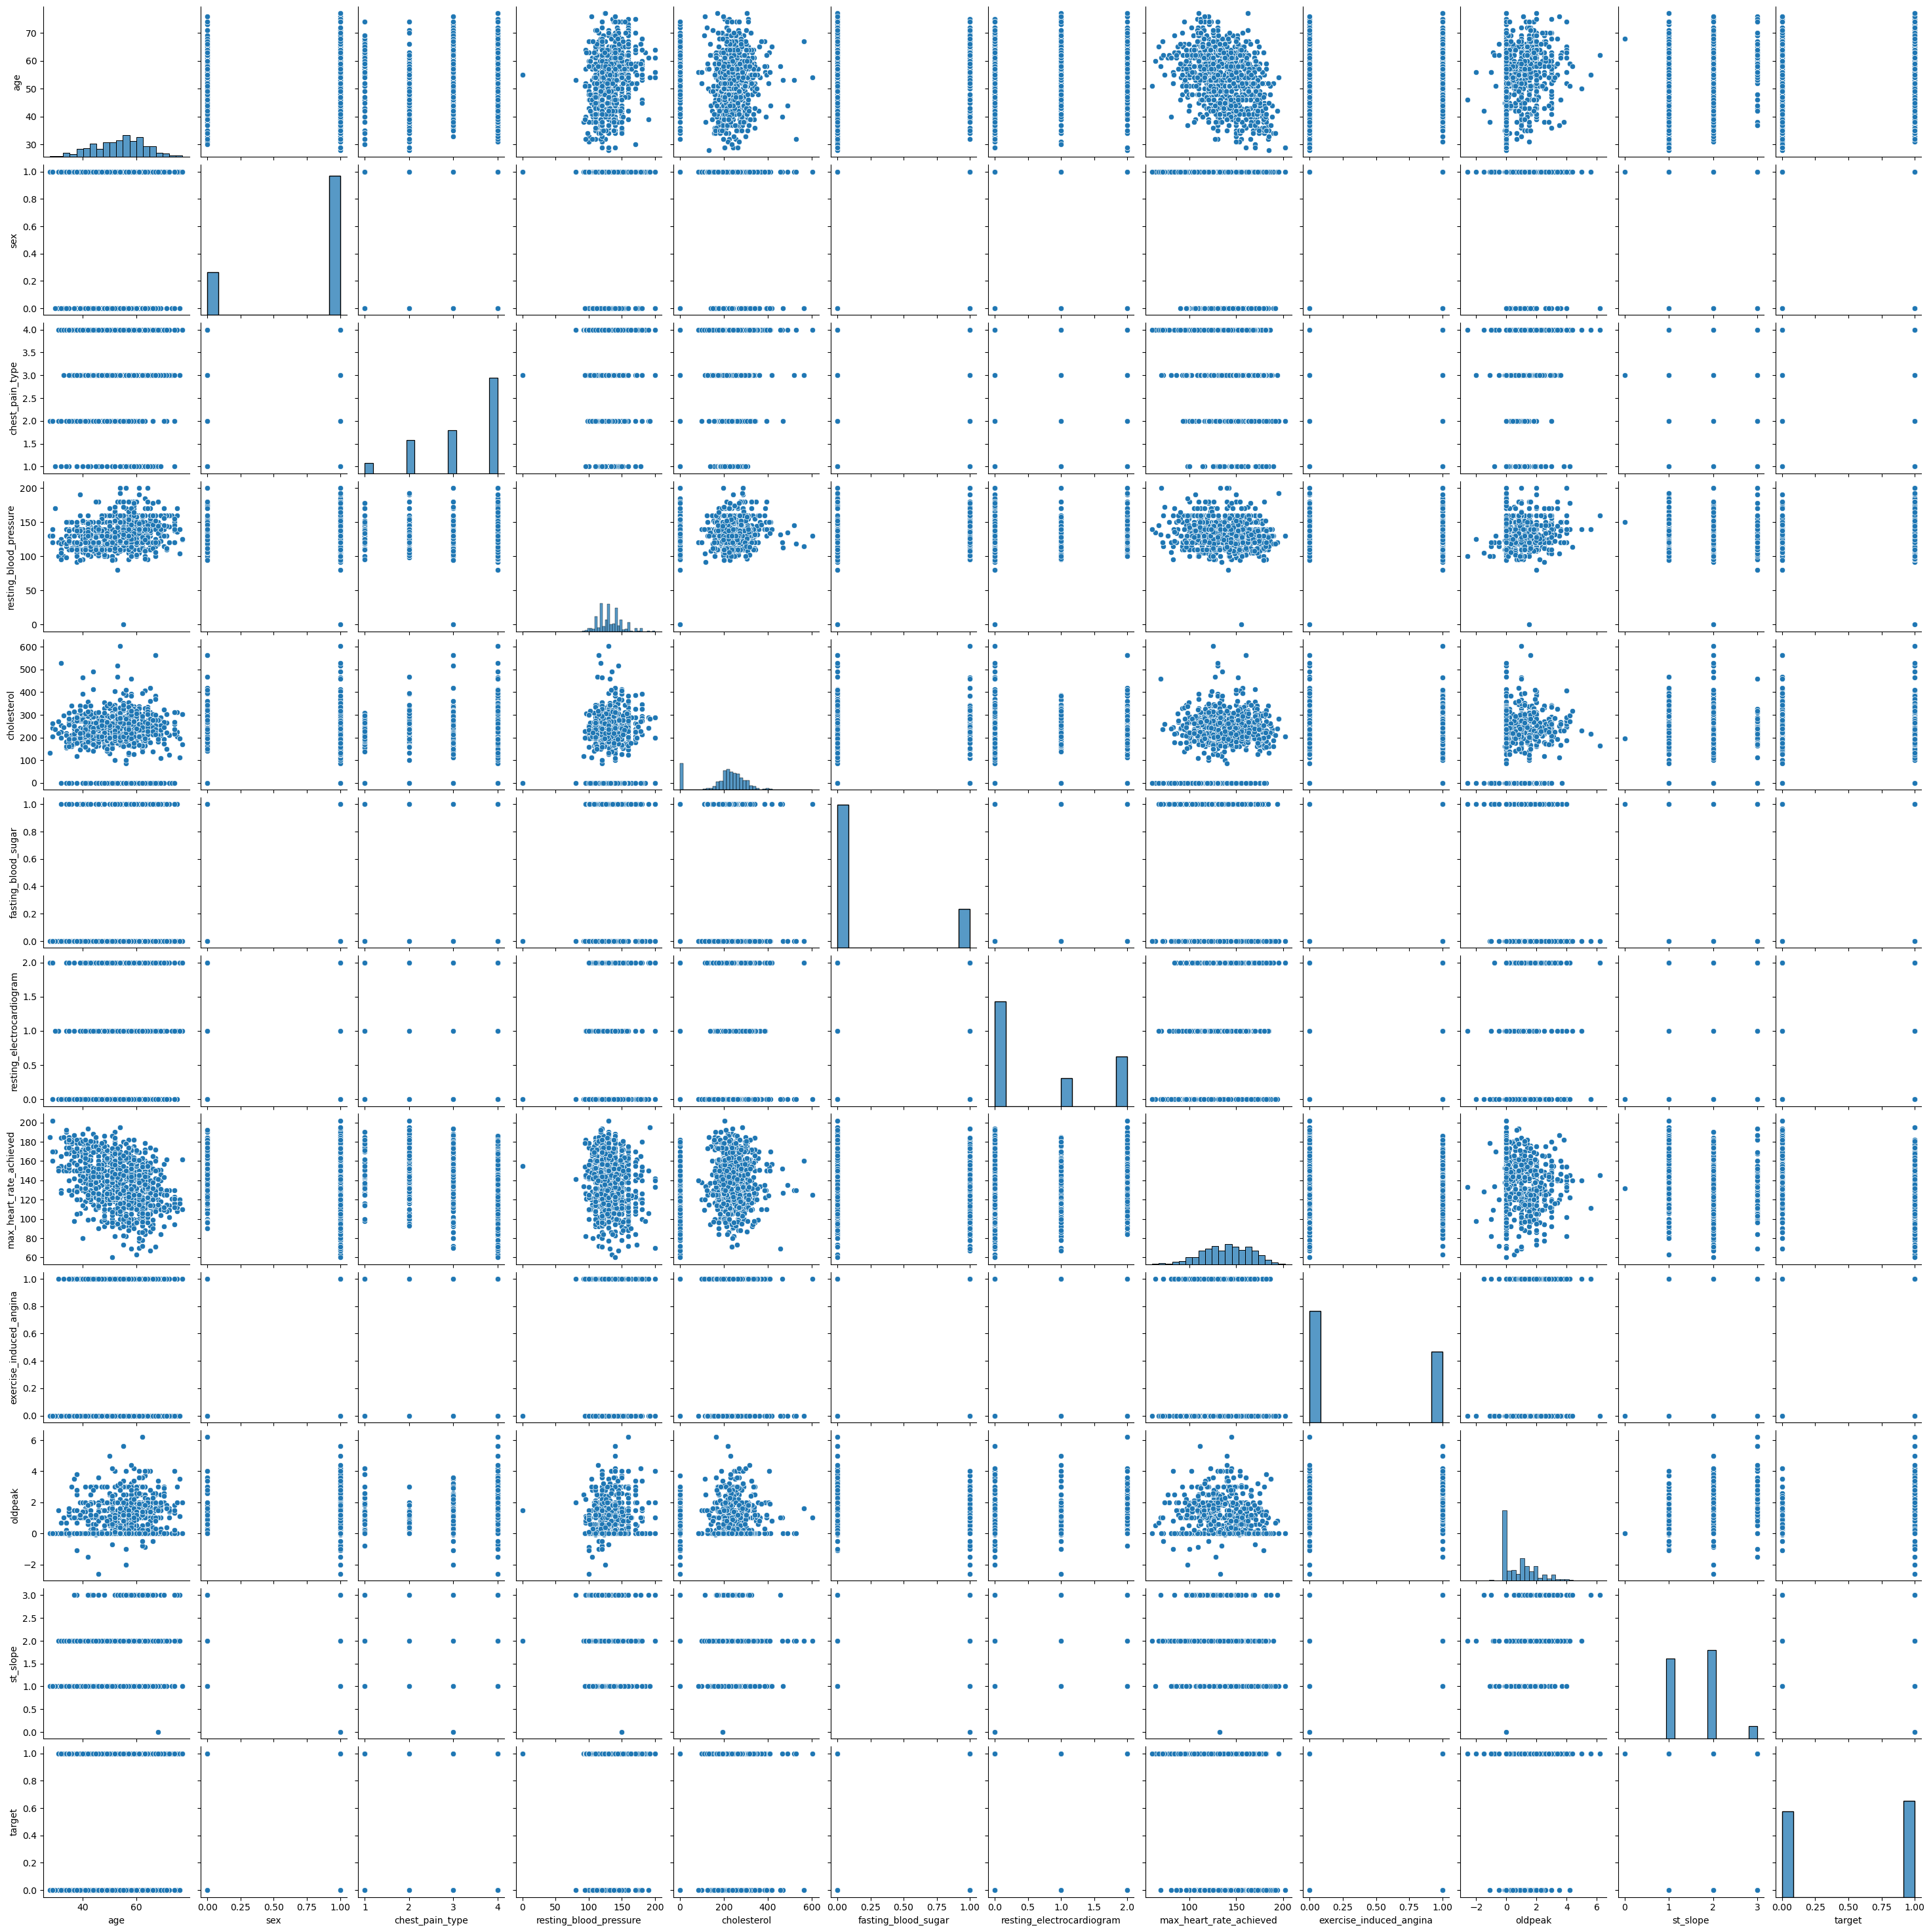

In [38]:
sns.pairplot(df)

converting count / numerical data into categorical data for better Understanding of data

we make a heatmap that will show the corelation between target and other features

<Axes: >

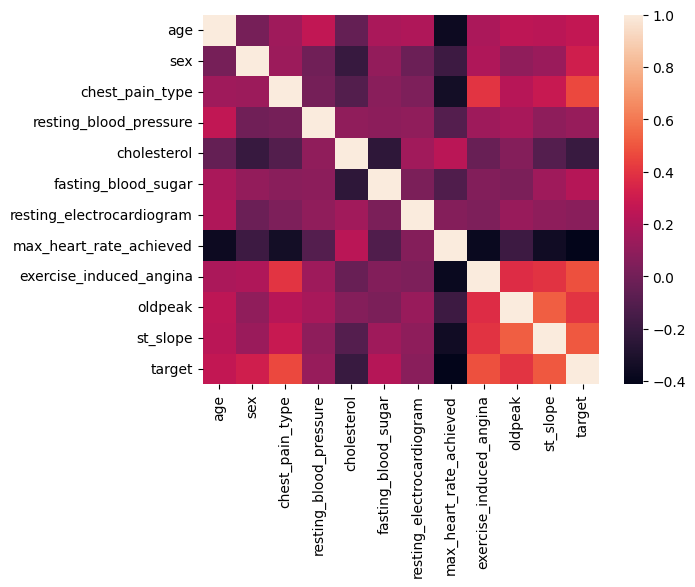

In [17]:
sns.heatmap(df.corr())

<Axes: xlabel='age', ylabel='Count'>

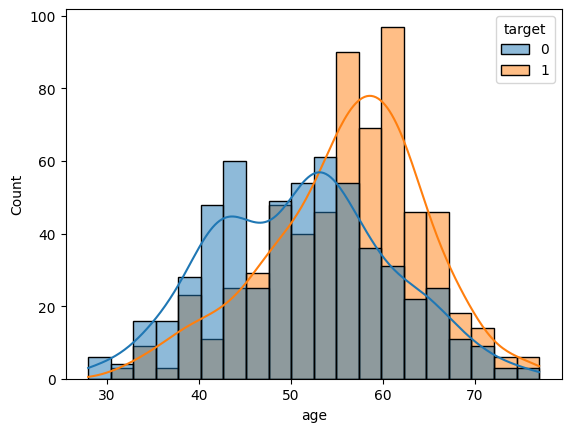

In [18]:
sns.histplot(x='age',data=df,hue='target',kde=True)

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

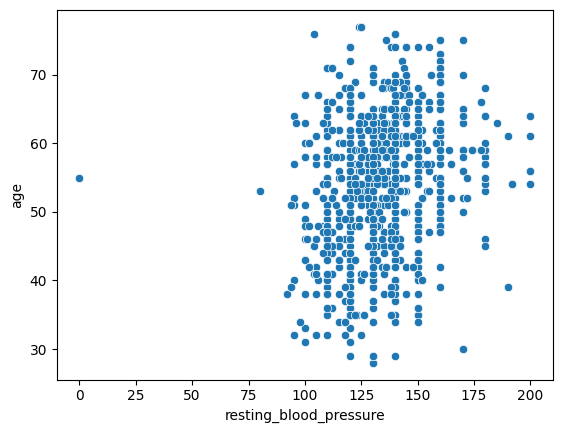

In [19]:
sns.scatterplot(x='resting_blood_pressure',y='age',data=df)

<Axes: xlabel='sex', ylabel='count'>

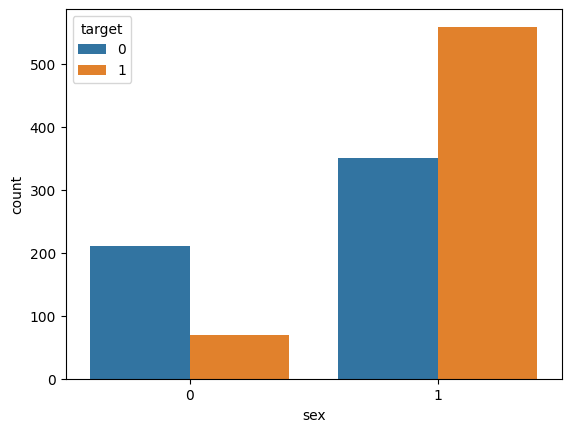

In [20]:
sns.countplot(x='sex',data=df,hue='target')

<Axes: xlabel='chest_pain_type', ylabel='max_heart_rate_achieved'>

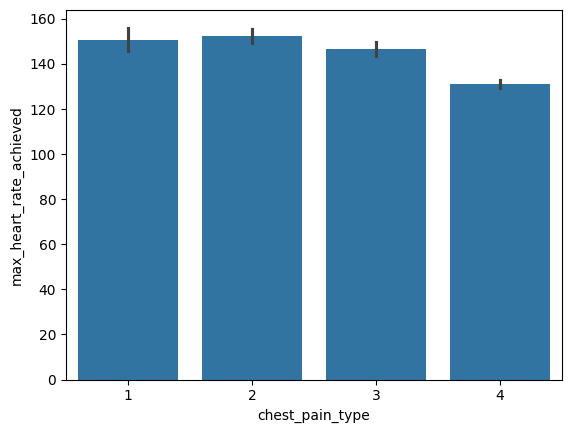

In [21]:
sns.barplot(x='chest_pain_type',y='max_heart_rate_achieved',data=df)

In [22]:
Numerical_column = ['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']

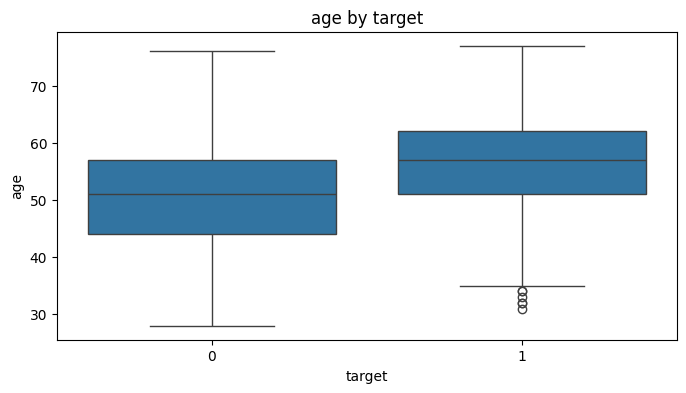

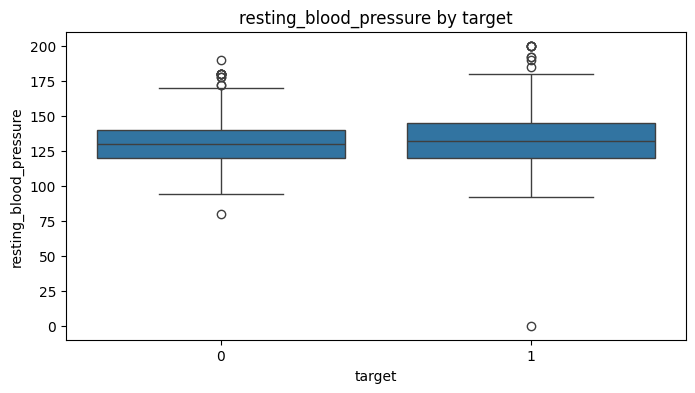

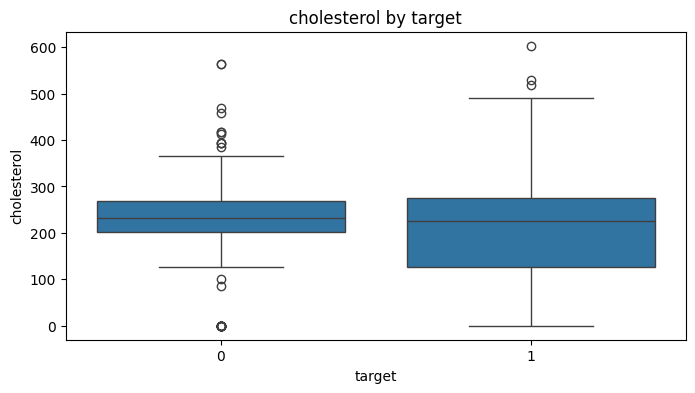

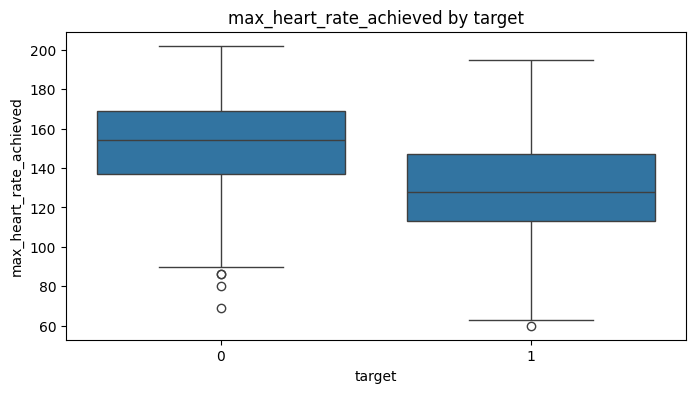

In [23]:
for val in Numerical_column:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='target', y=val)
    plt.title(f'{val} by target')
    plt.show()

In [24]:
df1 = df.drop_duplicates()

In [25]:
df1.duplicated().sum()

0

In [8]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [27]:
X = df1.drop('target',axis=1)
y = df1['target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Importing the model and Predict with them

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [34]:
models = {
    "log_model" : LogisticRegression(),
    "dtree" : DecisionTreeClassifier(),
    "svm" : SVC(),
    "knc" : KNeighborsClassifier(),
    "Rfc" : RandomForestClassifier(),
    "Ada" : AdaBoostClassifier(),
    "Gradient" : GradientBoostingClassifier()
}

In [36]:
param_grid = {
    "log_model" : {
        "random_state" : list(range(1,100))
    },
    
    "dtree" : {
        "criterion" : ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": list(range(1,20))
    },
    
    "svm" : {
    "gamma" : ["scale", "auto"],
    "degree": list(range(1,10))
    },
    
    "knc" : {"n_neighbors": list(range(1, 10))},
    
    "Rfc" : {
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : list(range(1,20))
    },
    
    "Ada" : {
    "n_estimators" : list(range(1,100)),
    "algorithm" : ["SAMME", "SAMME.R"]
    },
    
    "Gradient" : {
    "loss" : ["log_loss", "exponential"],
    "n_estimators" : list(range(1,50)),
    "criterion" : ["friedman_mse", "squared_error"]
    }
}

In [39]:
report = {}
report_val = {}

for i in range(len(list(models))):
    model = list(models.values())[i]
    para=param_grid[list(models.keys())[i]]

    gs = GridSearchCV(model,para,cv=5)
    gs.fit(X_train,y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train,y_train)

    #model.fit(X_train, y_train)  # Train model

    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_model_score = accuracy_score(y_train, y_train_pred)

    test_model_score = accuracy_score(y_test, y_test_pred)

    cross_score = cross_val_score(model, X_test, y_test, cv=5)

    report[list(models.keys())[i]] = test_model_score

    report_val[list(models.keys())[i]] = cross_score

c:\Users\shivd\Desktop\Heart_disease_model\Heart_Disease_Classification\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\shivd\Desktop\Heart_disease_model\Heart_Disease_Classification\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\shivd\Desktop\Heart_disease_model\Heart_Disease_Classification\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\shivd\Desktop\Heart_disease_model\Heart_Disease_Classification\venv\lib\site-packages\sklearn\

Accracy Score of the respective model

In [40]:

print(report)

{'log_model': 0.8514851485148515, 'dtree': 0.8547854785478548, 'svm': 0.8778877887788779, 'knc': 0.8646864686468647, 'Rfc': 0.8712871287128713, 'Ada': 0.8844884488448845, 'Gradient': 0.8415841584158416}


Cross Validation Score of respective Model

In [41]:
print(report_val)

{'log_model': array([0.75409836, 0.86885246, 0.7704918 , 0.86666667, 0.88333333]), 'dtree': array([0.83606557, 0.90163934, 0.81967213, 0.81666667, 0.85      ]), 'svm': array([0.83606557, 0.8852459 , 0.85245902, 0.91666667, 0.95      ]), 'knc': array([0.85245902, 0.86885246, 0.81967213, 0.9       , 0.91666667]), 'Rfc': array([0.85245902, 0.93442623, 0.83606557, 0.91666667, 0.88333333]), 'Ada': array([0.83606557, 0.8852459 , 0.80327869, 0.83333333, 0.9       ]), 'Gradient': array([0.81967213, 0.93442623, 0.86885246, 0.91666667, 0.88333333])}


#  We have trained our models and predict with them 

Model that gives the maximum accuracy : Support Vector Classifier (SVC)

The maximum Accuracy is : 0.8778877887788779

# Deployement of model

    We will be pickle our model to make API and Do the prediction

In [42]:
X_test[0].reshape(1,-1)
y_test

670    0
30     1
378    1
536    1
809    0
      ..
165    0
28     0
515    1
194    0
322    1
Name: target, Length: 303, dtype: int64

In [43]:
new_data = X_test[1].reshape(1,-1)
new_data.shape

(1, 11)

In [87]:
data = pd.DataFrame(new_data)
data.columns = X.columns
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,oldpeak,st_slope
0,-0.062474,0.547916,-0.308199,0.643718,2.991455,-0.522773,-0.759555,-0.271638,-0.838809,-0.826835,0.611183


In [66]:
report = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    para=param_grid[list(models.keys())[i]]

    gs = GridSearchCV(model,para,cv=3)
    gs.fit(X_train,y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train,y_train)

    #model.fit(X_train, y_train)  # Train model

    y_test_pred = model.predict(scaler.transform(data))
    report.append(y_test_pred)
#     report[list(models.keys())[i]] = test_model_score

In [67]:
report

[array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64)]

In [44]:
pickle.dump(models,open('classification.pkl','wb'))

pickled_model = pickle.load(open('classification.pkl','rb'))

In [45]:
classification = pickle.load(open('classification.pkl','rb'))
scaler = pickle.load(open('scaling.pkl','rb'))

In [46]:
classification

{'log_model': LogisticRegression(random_state=1),
 'dtree': DecisionTreeClassifier(max_depth=5, splitter='random'),
 'svm': SVC(degree=1),
 'knc': KNeighborsClassifier(n_neighbors=7),
 'Rfc': RandomForestClassifier(max_depth=5),
 'Ada': AdaBoostClassifier(n_estimators=20),
 'Gradient': GradientBoostingClassifier(n_estimators=42)}

In [47]:
pickle.dump(param_grid,open('param.pkl','wb'))